<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2022-09-23 07:03:30--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.02s   

2022-09-23 07:03:30 (3.98 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2022-09-23 07:03:30--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43191

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
comb = [dfJ, dfD, dfB, dfT, dfX]
all = pd.concat([dfJ, dfD, dfB, dfT, dfX])

In [ ]:
all

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all.drop(all.iloc[:,14:], axis = 1, inplace = True)

In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141 entries, 0 to 991
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  664 non-null    object 
 1   LT          665 non-null    object 
 2   LB          663 non-null    float64
 3   KT          663 non-null    float64
 4   KM          662 non-null    float64
 5   garasi      333 non-null    float64
 6   carport     550 non-null    float64
 7   lokasi      663 non-null    object 
 8   sertifikat  658 non-null    object 
 9   listrik     628 non-null    float64
 10  hadap       214 non-null    object 
 11  harga       663 non-null    float64
 12  URL         663 non-null    object 
 13  deskripsi   654 non-null    object 
dtypes: float64(7), object(7)
memory usage: 485.3+ KB


In [ ]:
new = all.drop_duplicates()

In [ ]:
new.isna().sum()

created_at      2
LT              1
LB              3
KT              3
KM              4
garasi        333
carport       116
lokasi          3
sertifikat      8
listrik        38
hadap         452
harga           3
URL             3
deskripsi      12
dtype: int64

In [ ]:
new['hadap'] = new['hadap'].astype('category')
new['lokasi'] = new['lokasi'].astype('category')
new['sertifikat'] = new['sertifikat'].astype('category')
new['garasi'] = new['lokasi'].astype('string')
new['carport'] = new['sertifikat'].astype('string')
new.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

created_at      object
LT              object
LB             float64
KT             float64
KM             float64
garasi          string
carport         string
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
URL             object
deskripsi       object
dtype: object

In [ ]:
new1 = new.fillna(new.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [57]:
new1['garasi'] = new1['garasi'].fillna('0')

In [58]:
new1['carport'] = new1['carport'].fillna('0')

In [59]:
new1.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


In [ ]:
new1.isnull().sum()

created_at      2
LT              1
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          3
sertifikat      8
listrik         0
hadap         452
harga           0
URL             3
deskripsi      12
dtype: int64

In [ ]:
new1.shape

(666, 14)

In [ ]:
new1.describe()

,LB,KT,KM,listrik,harga
count,666.00000,666.000000,666.000000,666.000000,6.660000e+02
mean,151.38009,3.155354,2.303625,3057.961783,2.188769e+09
std,198.98251,1.384663,1.369908,4632.631917,7.579567e+09
min,15.00000,1.000000,1.000000,900.000000,4.100000e+01
25%,50.00000,2.000000,1.000000,1300.000000,1.955000e+03
50%,84.00000,3.000000,2.000000,2200.000000,4.638000e+08
75%,179.50000,4.000000,3.000000,3057.961783,1.350000e+09
max,2500.00000,10.000000,10.000000,66000.000000,1.050000e+11


In [38]:
new2 = new1.dropna(subset=['LT'])

In [41]:
new2.isnull().sum()

created_at      1
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          2
sertifikat      7
listrik         0
hadap         451
harga           0
URL             2
deskripsi      11
dtype: int64

In [42]:
new3 = new2.dropna(subset=['created_at'])

In [43]:
new3.isnull().sum()

created_at      0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          1
sertifikat      6
listrik         0
hadap         450
harga           0
URL             1
deskripsi      10
dtype: int64

In [44]:
new3.describe()

,LB,KT,KM,listrik,harga
count,664.000000,664.000000,664.000000,664.000000,6.640000e+02
mean,151.380090,3.155354,2.303625,3057.961783,2.188769e+09
std,199.282409,1.386750,1.371973,4639.614034,7.590991e+09
min,15.000000,1.000000,1.000000,900.000000,4.100000e+01
25%,50.000000,2.000000,1.000000,1300.000000,1.950000e+03
50%,83.500000,3.000000,2.000000,2200.000000,4.580000e+08
75%,180.000000,4.000000,3.000000,3057.961783,1.350000e+09
max,2500.000000,10.000000,10.000000,66000.000000,1.050000e+11


In [45]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [46]:
all_new = np.abs(new3.harga - new3.harga.mean())<=(2*new3.harga.std())
# mu-2s<x<mu+2s
print(all_new.shape)
all_new.head()

(664,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

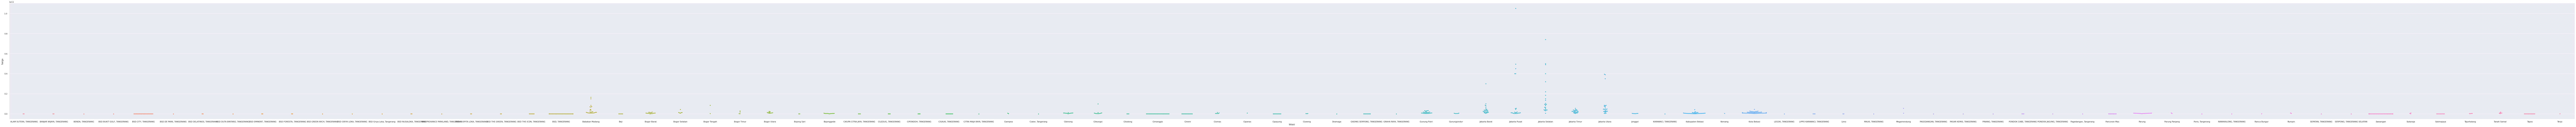

In [65]:
p= sns.catplot(x="lokasi", y="harga", kind="swarm", data= new3, height = 10, aspect = 20)

In [62]:
new3.sort_values(by='harga', ascending=0)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
21,07-12-2021,700.0,2000.0,10.0,10.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,66000.000000,Utara,1.050000e+11,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
44,07-12-2021,738.0,500.0,5.0,3.0,Jakarta Selatan,SHM + IMB,Jakarta Selatan,SHM + IMB,13200.000000,NaN,7.400000e+10,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...
46,06-12-2021,840.0,800.0,5.0,4.0,Jakarta Selatan,SHM,Jakarta Selatan,SHM,3057.961783,NaN,5.000000e+10,https://rumahdijual.com/jakarta-pusat/11761428...,Kawasan Rasuna Epicentrum
6,06-12-2021,424.0,1000.0,4.0,5.0,Jakarta Pusat,SHM,Jakarta Pusat,SHM,33000.000000,Timur,4.950000e+10,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
42,05-12-2021,950.0,1400.0,6.0,4.0,Jakarta Selatan,SHM,Jakarta Selatan,SHM,23000.000000,NaN,4.900000e+10,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4-12-2021,50,50.0,2.0,1.0,Cipayung,SHM,Cipayung,SHM,1300.000000,Selatan,1.850000e+02,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
7,12-06-2021,72.0,45.0,2.0,1.0,"SEPATAN, TANGERANG",SHM,"SEPATAN, TANGERANG",SHM,1300.000000,Selatan,1.480000e+02,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
5,6-12-2021,40,30.0,2.0,1.0,Cipayung,SHM,Cipayung,SHM,1300.000000,NaN,1.300000e+02,https://www.rumah123.com/properti/depok/hos928...,Promo akhir tahun rumah cantik dijual murah mu...
33,12-06-2021,128.0,88.0,3.0,3.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)","BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.000000,Tenggara,9.500000e+01,https://www.rumah123.com/properti/tangerang/ho...,Hi Direct Buyer...\nDijual Rumah The Icon BSD ...


In [68]:
beli = new3[new3['harga'] <= 25000]
beli.sort_values(by='harga', ascending=0)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
32,12-06-2021,534.0,1000.0,5.0,6.0,"BSD, TANGERANG",SHM,"BSD, TANGERANG",SHM,16500.000000,NaN,15500.0,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
49,12-06-2021,534.0,1000.0,8.0,8.0,"BSD, TANGERANG",SHM,"BSD, TANGERANG",SHM,16500.000000,NaN,15500.0,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
66,12-06-2021,276.0,441.0,4.0,4.0,"BSD FORESTA, TANGERANG",SHM,"BSD FORESTA, TANGERANG",SHM,3057.961783,NaN,14000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
20,12-06-2021,276.0,441.0,4.0,4.0,"BSD CITY, TANGERANG",0,"BSD CITY, TANGERANG",NaN,11000.000000,Timur Laut,13000.0,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...
114,12-08-2021,276.0,441.0,4.0,4.0,"BSD, TANGERANG",SHM,"BSD, TANGERANG",SHM,11000.000000,NaN,13000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4-12-2021,50,50.0,2.0,1.0,Cipayung,SHM,Cipayung,SHM,1300.000000,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
7,12-06-2021,72.0,45.0,2.0,1.0,"SEPATAN, TANGERANG",SHM,"SEPATAN, TANGERANG",SHM,1300.000000,Selatan,148.0,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
5,6-12-2021,40,30.0,2.0,1.0,Cipayung,SHM,Cipayung,SHM,1300.000000,NaN,130.0,https://www.rumah123.com/properti/depok/hos928...,Promo akhir tahun rumah cantik dijual murah mu...
33,12-06-2021,128.0,88.0,3.0,3.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)","BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.000000,Tenggara,95.0,https://www.rumah123.com/properti/tangerang/ho...,Hi Direct Buyer...\nDijual Rumah The Icon BSD ...


# Jawaban Petunjuk:

1. Data yang disediakan oleh PT Ray Pink Property Indonesia (RPPI) kepada kami bisa dibilang merupakan data yang kurang baik karena di dalamnya ditemukan banyak missing values.
2. Salah satu saran perbaikan data ke DE/DBA perusahaan yang bisa kita berikan agar RPPI menjadi data driven company yang unggul kembali lagi ke permasalahan data yang kami temukan, yaitu tidak diperlukannya missing values dalam data karena hanya menghambat pengolahan data.
3. Terdapat kecenderungan rumah dengan lokasi di Jakarta, terutama di Jakarta Pusat dan Jakarta Selatan, memiliki harga jual lebih mahal dibandingkan kota-kota lainnya.
4. Kota yang sesuai untuk RPPI membangun kantor cabangnya merupakan Kota Bogor dikarenakan jumlah rumah yang diiklankan untuk terjual pada Kota Bogor memiliki jumlah terbanyak dibandingkan dengan kota lainnya.
5. ...
6. Perusahaan seharusnya membeli rumah di daerah BSD karena harganya masih dalam budget (dalam kirasan Rp25M) dan lokasinya strategis karena masih banyak tanah kosong sehingga kami berpikir bahwa daerah tersebut akan terus berkembang. Selain itu, berdasarkan riset ke tempat di daerah tersebut, daerah BSD memang strategis.